In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import glob

In [2]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ',  'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'UK'}

abbr_list=list(countries.values())

In [3]:
fuels=['Biomass', 'Fossil Brown coal/Lignite', 'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat', 'Geothermal', 'Hydro Pumped Storage', 'Hydro Pumped Storage', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore']

In [4]:
import matplotlib.pyplot as plt 

# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

In [5]:
import internal_inconsistencies as ii

importing Jupyter notebook from internal_inconsistencies.ipynb
importing Jupyter notebook from data_preperation.ipynb


,Country,No. of missing data in Load data,No. of missing data in Generation data,No. of missing data in Transmission data
0,AT,0,0,0
1,BE,0,8027,0
2,BG,26,8760,1732
3,CH,0,8760,0
4,CZ,7,44,0
5,DE,96,34848,36
6,DK,0,0,0
7,EE,168,2266,4437
8,ES,2,8780,0
9,FI,3,28,429


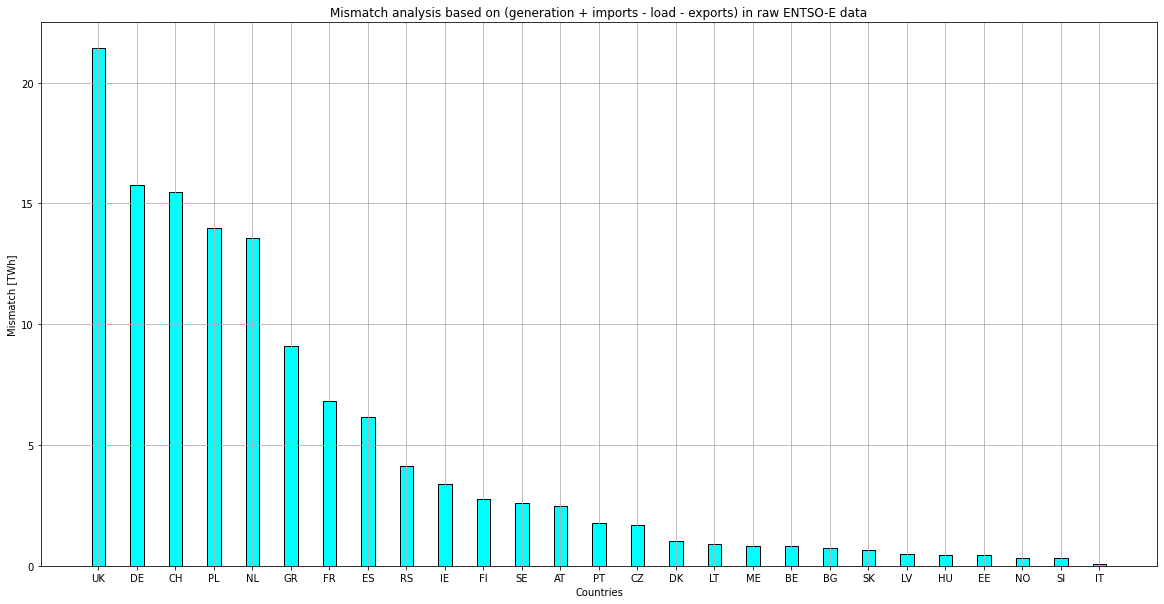

In [12]:
mismatch_data = ii.mismatch_raw_data(countries)


In [13]:
def hourly_data(df):
    length = len(df.index)
    if length == 35040:
        divider = 4
    elif length == 17520:
        divider = 2
    else:
        divider = 1
    return (df,divider)

stat_data = pd.read_excel('../Data Sources/ENTSO-E/entsoe_sfs2018_web.xlsx').iloc[1:28,].reset_index(drop=True)
stat_data = stat_data[['Country', 'Total net generation', 'Consumption','Sum of imports', 'Sum of exports']]
stat_data.iloc[:, 3:5] = stat_data.iloc[:, 3:5]/1000

methods = ['Nearest Neighbours Mean', 'Polynomial Linear Regression','Internal Sigma']
types = ['Generation','Load']

for index, value in enumerate(stat_data.loc[:,'Country']):
    
    stat_data.loc[index, 'Raw_gen'] = mismatch_data[value][0]/1000000
    stat_data.loc[index, 'Raw_load'] = mismatch_data[value][2]/1000000
    stat_data.loc[index, 'Raw_imports'] = mismatch_data[value][1]/1000000
    stat_data.loc[index, 'Raw_exports'] = mismatch_data[value][3]/1000000

    for method in methods:
        for type in types:

            df,divider=hourly_data(pd.read_csv(f'../Data Sources/output/{method}/{type}/{value}.csv'))

            stat_data.loc[index, f'{type}_{method}'] = df.iloc[:, 1:].sum(axis=1).sum()/(divider*1000000) 

        df = pd.read_csv(f'../Data Sources/output/{method}/Transmission/all_transmissions.csv').iloc[:, 1:]

        imports = [x for x in df.columns.values if value in x[-2:]]
        exports = [x for x in df.columns.values if value in x[:2]]

        stat_data.loc[index,f'Imports_{method}'] = df[imports].sum(axis=1).sum()/1000000
        stat_data.loc[index,f'Exports_{method}'] = df[exports].sum(axis=1).sum()/1000000
print(stat_data)


   Country Total net generation Consumption  Sum of imports  Sum of exports  \
0       AT                 67.5        71.4          29.393          19.057   
1       BE                 69.1        85.1          21.650           4.313   
2       BG                 42.3        34.1           2.220          10.029   
3       CH                 67.6        62.3          30.420          31.693   
4       CZ                 81.8        66.6          11.562          25.453   
5       DE                597.6       538.1          31.542          82.673   
6       DK                 28.9        34.1          15.606          10.413   
7       EE                 10.3         8.7           3.514           5.364   
8       ES                  261       268.9          24.014          12.910   
9       FI                 67.5        87.4          23.397           3.459   
10      FR                548.6       478.3          13.466          76.020   
11      UK                285.8         304         

In [14]:
for i in range(1,5):
    globals()[f'x{i}'] = []
    for j in range(1,5):
       globals()[f'x{i}'].append(abs(stat_data.iloc[:,j].sum()-stat_data.iloc[:,i*4+j].sum())*100/stat_data.iloc[:,j].sum())
        # print(abs(stat_data.iloc[:, j].sum()-stat_data.iloc[:, i*4+j].sum())*100/stat_data.iloc[:, j].sum())
    print(globals()[f'x{i}'])


[6.050726154346395, 2.176570295139419, 13.764575542965046, 14.810904392515699]
[5.893932873839961, 2.1305869959729895, 13.69132690431224, 14.270231007628604]
[5.865735990812188, 2.1167374920103392, 13.573517390099965, 14.139065989144802]
[2.216277385981169, 1.1757319980820267, 17.565301117730076, 15.824968430078107]


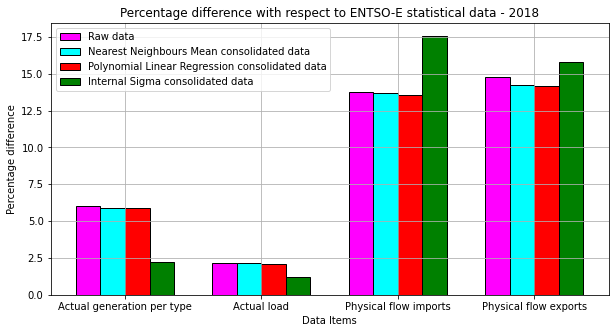

In [17]:
width = 0.18
labels = ['Actual generation per type', 'Actual load','Physical flow imports', 'Physical flow exports']
X = np.arange(4)
plt.figure(figsize=(10, 5))
plt.bar([x-3*width/2 for x in X], x1, width, color='magenta',edgecolor='black', label='Raw data')
plt.bar([x-width/2 for x in X], x2, width, color='aqua',edgecolor='black', label='Nearest Neighbours Mean consolidated data')
plt.bar([x+width/2 for x in X], x3, width, color='red',edgecolor='black', label='Polynomial Linear Regression consolidated data')
plt.bar([x+3*width/2 for x in X], x4, width, color='green',edgecolor='black', label='Internal Sigma consolidated data')
plt.xlabel('Data Items')
plt.ylabel('Percentage difference')
plt.title('Percentage difference with respect to ENTSO-E statistical data - 2018')
plt.legend()
plt.grid()
plt.xticks(X, labels)
plt.show()


In [23]:
selected_countries = ['AT','CZ','DK','ES','FR','IE','NL','NO','PT','SI','SE','CH','UK']
stat_data = pd.read_excel('../Data Sources/ENTSO-E/entsoe_sfs2018_web.xlsx').iloc[1:28, ].reset_index(drop=True)
stat_data = stat_data[['Country', 'Total net generation','Consumption', 'Sum of imports', 'Sum of exports']]
stat_data.iloc[:, 3:5] = stat_data.iloc[:, 3:5]/1000

methods = ['Nearest Neighbours Mean',
           'Polynomial Linear Regression', 'Internal Sigma']
types = ['Generation', 'Load']

for index, value in enumerate(stat_data.loc[:, 'Country']):

    if value in selected_countries:

        stat_data.loc[index, 'Raw_gen'] = mismatch_data[value][0]/1000000
        stat_data.loc[index, 'Raw_load'] = mismatch_data[value][2]/1000000
        stat_data.loc[index, 'Raw_imports'] = mismatch_data[value][1]/1000000
        stat_data.loc[index, 'Raw_exports'] = mismatch_data[value][3]/1000000

        for method in methods:
            for type in types:

                df, divider = hourly_data(pd.read_csv(
                    f'../Data Sources/output/{method}/{type}/{value}.csv'))

                stat_data.loc[index, f'{type}_{method}'] = df.iloc[:, 1:].sum(
                    axis=1).sum()/(divider*1000000)

            df = pd.read_csv(
                f'../Data Sources/output/{method}/Transmission/all_transmissions.csv').iloc[:, 1:]

            imports = [x for x in df.columns.values if value in x[-2:]]
            exports = [x for x in df.columns.values if value in x[:2]]

            stat_data.loc[index, f'Imports_{method}'] = df[imports].sum(
                axis=1).sum()/1000000
            stat_data.loc[index, f'Exports_{method}'] = df[exports].sum(
                axis=1).sum()/1000000
    else:
        stat_data = stat_data.drop(labels=index, axis=0)
stat_data = stat_data.reset_index(drop=True)
print(stat_data)


KeyError: '[18] not found in axis'

[45.68214925985568, 45.4055743951676, 57.47109773371105, 45.60591912101475]
[45.59840910328471, 45.3692847978154, 57.453421045797924, 45.59069929434982]
[45.590758399609314, 45.35974264146154, 57.44958826809295, 45.58600550476889]
[43.87488911549635, 44.79973613869046, 56.00570397819189, 43.35381593783051]


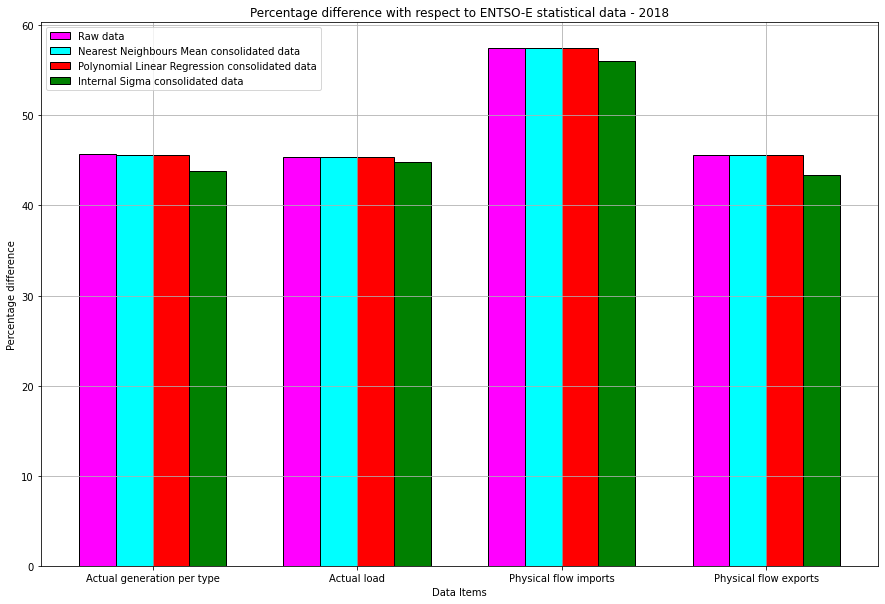

In [20]:
for i in range(1, 5):
    globals()[f'x{i}'] = []
    for j in range(1, 5):
       globals()[f'x{i}'].append(abs(stat_data.iloc[:, j].sum(
       )-stat_data.iloc[:, i*4+j].sum())*100/stat_data.iloc[:, j].sum())
       # print(abs(stat_data.iloc[:, j].sum()-stat_data.iloc[:, i*4+j].sum())*100/stat_data.iloc[:, j].sum())
    print(globals()[f'x{i}'])

width = 0.18
labels = ['Actual generation per type', 'Actual load',
          'Physical flow imports', 'Physical flow exports']
X = np.arange(4)
plt.figure(figsize=(15, 10))
plt.bar([x-3*width/2 for x in X], x1, width,
        color='magenta', edgecolor='black', label='Raw data')
plt.bar([x-width/2 for x in X], x2, width, color='aqua',
        edgecolor='black', label='Nearest Neighbours Mean consolidated data')
plt.bar([x+width/2 for x in X], x3, width, color='red', edgecolor='black',
        label='Polynomial Linear Regression consolidated data')
plt.bar([x+3*width/2 for x in X], x4, width, color='green',
        edgecolor='black', label='Internal Sigma consolidated data')
plt.xlabel('Data Items')
plt.ylabel('Percentage difference')
plt.title('Percentage difference with respect to ENTSO-E statistical data - 2018')
plt.legend()
plt.grid()
plt.xticks(X, labels)
plt.show()


In [ ]:
stat_data.to_csv('temp.csv')

In [ ]:
x = [[1,2],[2,3],[3,4]]
for i,j in x:
    print(i,j)